# Temat: Określenie czy dana osoba zarabia więcej niż 50tyś dolarów rocznie.

## 1. Omówienie tematu

Badamy dane dotyczące zarobków w Ameryce w roku 1994. Później się tu coś dopisze.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

adult = pd.read_csv("adult.csv")

## 2. Wstępna analiza danych

In [23]:
adult['income'] = adult['income'].map(lambda x: {'>50K': 1, '<=50K': 0}[x])

### 2.1 Badanie pustych pól

Poniżej znajduje się skrypt badający wypełnienie poszczególnych kolumn

Rozmiar: 32561 wierszy.


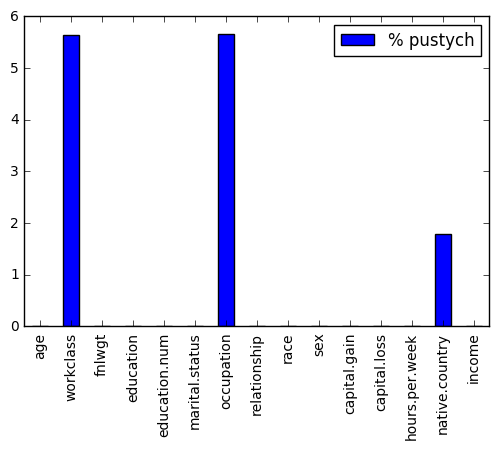

In [171]:
size = len(adult)
print "Rozmiar:", size, "wierszy."
frame = pd.DataFrame(index = adult.columns)
for col in adult.columns:
    empty = 0
    try:
        empty = len(adult.loc[adult[col] == '?'])
    except:
        empty = len(adult.loc[adult[col] == np.NaN])
    percentage = float(empty)*100.0/float(size)
    frame.set_value(col, '% pustych', percentage)
frame.transpose()
frame.plot(kind='bar')

Jak widać, jedynymi kolumnami posiadającymi puste pola są te określające segment rynku, zawód i kraj pochodzenia. Ponadto widać podobną ilość pustych pól w kategoriach segmentu rynku i zatrudnienia, co każe sądzić że są w jakiś sposób ze sobą skorelowane.

In [167]:
dat = [len(adult.loc[adult['workclass'] == '?']), len(adult.loc[adult['occupation'] == '?']),
     len(adult.loc[adult['workclass'] == '?'].loc[adult['occupation'] == '?'])]
ind = ["Segment rynku", "Zawód", "Obydwa"]
pd.DataFrame(index=ind, data=dat, columns=['Nie podano razy'])

,Nie podano razy
Segment rynku,1836
Zawód,1843
Obydwa,1836


Jak widać w każdym wypadku nie podania segmentu rynku badany nie podawał także uprawianego zawodu. Poniżej znajduje się analiza ilości niezatrudnionych osób względem wieku.

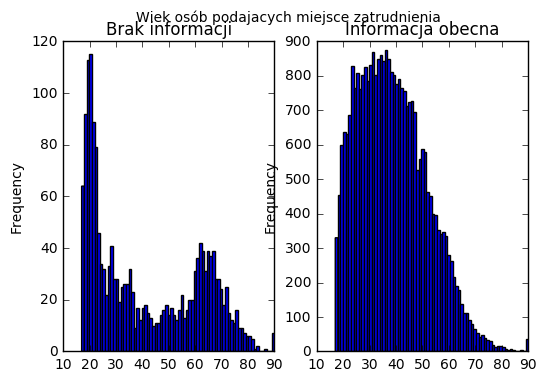

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df1 = adult.loc[adult['workclass'] == '?'].loc[adult['occupation'] == '?'].sort_values(by=['age'])
dfh1 = df1['age'].plot.hist(bins=(90-16), title = 'Brak informacji', ax=ax1)
df2 = adult.loc[adult['workclass'] != '?'].loc[adult['occupation'] != '?'].sort_values(by=['age'])
dfh2 = df2['age'].plot.hist(bins=(90-16), title = 'Informacja obecna', ax=ax2)
fig.suptitle(u"Wiek osób podajacych miejsce zatrudnienia")


Na powyższym wykresie widać duży odsetek osób niezatrudnionych w wieku ok. 20 lat i osób po 60 roku życia. Każe to sądzić, że osoby w wieku 20 lat jeszcze się uczą, natomiast z opracowań statystycznych wynika, że w latach 90. przeciętna wieku przejścia na emeryturę w Ameryce wynosiła 62 lata, zarówno dla kobiet jak i mężczyzn, co potwierdza przypuszczenia, że osoby niepodające zatrudnienia po 60 roku życia to emeryci. Oznacza to, że nie podanie zatrudnienia to brak pracy. Można zauważyć inny rozkład na wykresie z osobami podającymi miejsce zatrudnienia. Dlatego osobom posiadającym znak '?' przypisujemy wartość 'None' oznaczającą aktualny brak zatrudnienia.

In [28]:
wd1 = adult
adult['occupation'] = adult['occupation'].replace(to_replace='?', value='None')
adult['workclass'] = adult['workclass'].replace(to_replace='?', value='None')

In [29]:
adult.loc[adult['workclass'] == 'None'].loc[adult['occupation'] == 'None'].corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.082535,0.002081,0.072523,0.043599,-0.138976,0.245685
fnlwgt,-0.082535,1.000000,-0.044200,0.014508,-0.015572,0.022762,-0.015752
education.num,0.002081,-0.044200,1.000000,0.071851,0.071484,-0.045758,0.267660
capital.gain,0.072523,0.014508,0.071851,1.000000,-0.020206,0.037798,0.255288
capital.loss,0.043599,-0.015572,0.071484,-0.020206,1.000000,0.029185,0.105927
hours.per.week,-0.138976,0.022762,-0.045758,0.037798,0.029185,1.000000,0.096634
income,0.245685,-0.015752,0.267660,0.255288,0.105927,0.096634,1.000000


In [25]:
adult.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<read-write buffer for 0x7f4b7c3b1940, size 130244, offset 0 at 0x7f4b7c396b70>

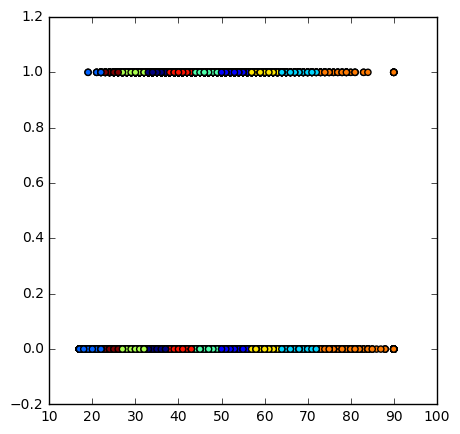

In [101]:
df = adult.copy()

del df['native.country']
df.columns = ['age','workclass','fnlgwt','education','educnum','martstat','occupation','relationship','race','sex','gain','loss','hours','income']
df['income'] = adult['income'].map({'>50K': 1, '<=50K': 0})


from sklearn.cluster import KMeans
X1,Y1 = df.age.reshape(-1,1) , df.income.reshape(-1,1)


kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit( X1,Y1)
etykiety_klastrow = kmeans.fit_predict(X1,Y1)
plt.figure(figsize=(5,5))
plt.scatter(X1, Y1, marker='o', c=etykiety_klastrow)
etykiety_klastrow.data


In [3]:
adult.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

In [3]:
adult.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

In [10]:
for x in adult['native.country'].unique():
    print x, len(adult.loc[adult['native.country'] == x])

United-States 29170
? 583
Mexico 643
Greece 29
Vietnam 67
China 75
Taiwan 51
India 100
Philippines 198
Trinadad&Tobago 19
Canada 121
South 80
Holand-Netherlands 1
Puerto-Rico 114
Poland 60
Iran 43
England 90
Germany 137
Italy 73
Japan 62
Hong 20
Honduras 13
Cuba 95
Ireland 24
Cambodia 19
Peru 31
Nicaragua 34
Dominican-Republic 70
Haiti 44
El-Salvador 106
Hungary 13
Columbia 59
Guatemala 64
Jamaica 81
Ecuador 28
France 29
Yugoslavia 16
Scotland 12
Portugal 37
Laos 18
Thailand 18
Outlying-US(Guam-USVI-etc) 14
